## Objective:
Determine if the new website design (treatment group) leads to a higher conversion rate compared to the old design (control group).

## 1. Import Libraries & Load Data

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Load the dataset
file_path = 'ab_data.csv'
df = pd.read_csv(file_path)

#Initial Observation
print(df.head())
print(df.info())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page          0
1   804228  2017-01-12 08:01:45.159739    control     old_page          0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page          0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page          0
4   864975  2017-01-21 01:52:26.210827    control     old_page          1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB
None


## 2. Data Cleaning

###Remove Mismatched Rows
We will start with removing mismatched rows to ensure that users in the treatment group received the new page and those in the control group received the old page.

In [3]:
# Identify mismatched rows
mismatched = df[
    ((df['group'] == 'treatment') & (df['landing_page'] != 'new_page')) |
    ((df['group'] == 'control') & (df['landing_page'] != 'old_page'))
]
# Remove mismatched rows
df_clean = df.drop(mismatched.index)
print(df_clean.info())

NameError: name 'df' is not defined

### Remove Duplicate Users
Next, we will remove duplicated user entries to ensure each row represents a unique user

In [18]:
# Check for duplicate users
duplicate_users = df_clean[df_clean.duplicated('user_id')]
# Remove duplicate users
df_clean = df_clean.drop(duplicate_users.index)
print(df_clean.info())

<class 'pandas.core.frame.DataFrame'>
Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB
None


## 3. Exploratory Data Analysis (EDA)

Let's analyse the conversion rate statistics

In [20]:
# Overall conversion rate
overall_conversion = df_clean['converted'].mean()
# Conversion rate by group
conversion_rates = df_clean.groupby('group')['converted'].mean()
print("Overall coversion rate is: ", overall_conversion)
print(conversion_rates)

Overall coversion rate is:  0.11959708724499628
group
control      0.120386
treatment    0.118808
Name: converted, dtype: float64


Let's visualise the conversion rates by group

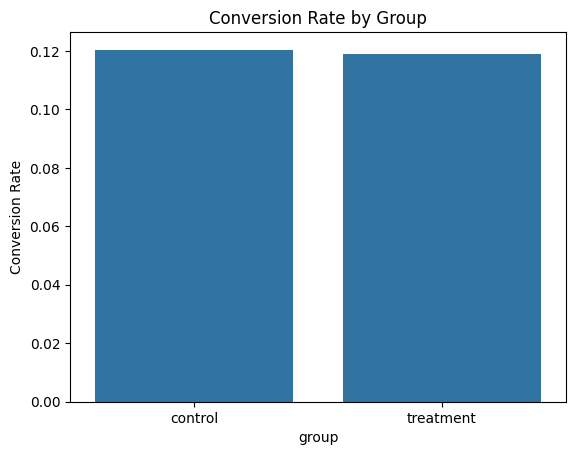

In [12]:
sns.barplot(x=conversion_rates.index, y=conversion_rates.values)
plt.title('Conversion Rate by Group')
plt.ylabel('Conversion Rate')
plt.show()


## 4. Hypothesis Testing

**Null Hypothesis (H₀):** There is no difference in conversion rates between the control and treatment groups.

**Alternative Hypothesis (H₁):** There is a significant difference in conversion rates between the control and treatment groups.

We'll perform a Z-test

In [13]:
# Number of users in each group
n_control = df_clean[df_clean['group'] == 'control'].shape[0]
n_treatment = df_clean[df_clean['group'] == 'treatment'].shape[0]

# Number of conversions in each group
conversions_control = df_clean[(df_clean['group'] == 'control') & (df_clean['converted'] == 1)].shape[0]
conversions_treatment = df_clean[(df_clean['group'] == 'treatment') & (df_clean['converted'] == 1)].shape[0]

# Calculating the proportion of conversions in each group.
p_control = conversions_control / n_control
p_treatment = conversions_treatment / n_treatment

# Pooled conversion rate
p_pool = (conversions_control + conversions_treatment) / (n_control + n_treatment)

# Standard error
se = np.sqrt(p_pool * (1 - p_pool) * (1/n_control + 1/n_treatment))

# Z-score
z_score = (p_treatment - p_control) / se

# P-value
p_value = stats.norm.sf(abs(z_score)) * 2  # Multiply by 2 for a two-tailed test, since we’re testing for any difference, not just an increase or decrease.

print(f'Z-score: {z_score}')
print(f'P-value: {p_value}')


Z-score: -1.3116075339133115
P-value: 0.18965258971881804


## 5. Conclusion
Since the p-value is >= 0.05, we fail to reject the null hypothesis, indicating no significant difference in conversion rates.